In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
X = df.drop(columns=["Weekly_Sales","Date"],axis=1)

In [19]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [20]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [21]:
X                                             # features / indepwndent variables

y = df['Weekly_Sales']                        # target / dependent variable

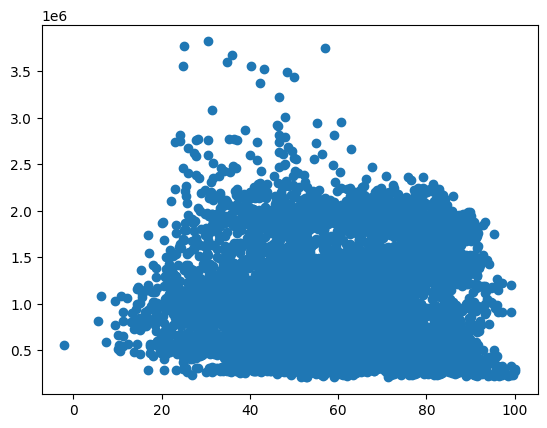

In [22]:
plt.scatter(X["Temperature"],y)

it is a non linear data 


In [23]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

# xtrain



# fit transform is used to add new features to the trained data

# transform is used to add new feature to the test data

# fit is used to train the model (linear regression) which consist (y=mx+c)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [25]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

xstand = stand.fit_transform(xtrain)

model.fit(xstand,ytrain)

xstand_test = stand.transform(xtest)

model.score(xstand_test,ytest)

0.148063534059508

In [26]:
model.score(xstand,ytrain)


0.13956378620960652

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)

xpoly = poly.fit_transform(xstand)

xtestpoly = poly.transform(xstand_test)

model.fit(xpoly,ytrain)

model.score(xtestpoly,ytest)


0.6000687965887954

In [28]:

model.score(xpoly,ytrain)

0.66211939079577

In [29]:
from sklearn.metrics import r2_score

ypredict = model.predict(xtestpoly)

ypredict

r2_score(ytest,ypredict)

0.6000687965887954